# Bagging:
It is a homogeneous weak learners’ model that learns from each other independently in parallel and combines them for determining the model average.

Step 1: Multiple subsets are created from the original data set with equal tuples, selecting observations with replacement.

Step 2: A base model is created on each of these subsets.

Step 3: Each model is learned in parallel with each training set and independent of each other.

Step 4: The final predictions are determined by combining the predictions from all the models.

# Bagging meta-estimator:
 A general-purpose ensemble method that reduces variance by training multiple instances of the same base model on different bootstrap samples of the data.

# How it works:
1. Creates multiple random subsets of the original training data by sampling with replacement (bootstrapping).
   
2. Trains a user-specified base estimator (e.g., a decision tree) on each of these smaller datasets.

3. Combines the predictions from all the individual models. For classification, this is typically done by majority voting; for regression, by averaging


# Random Forest
What it is: A specific and powerful implementation of the bagging meta-estimator that uses decision trees as the base model.

# How it works:
1. Uses the bagging method, but with an added layer of randomness.
   
2. For each decision tree, it not only uses a bootstrap sample of the data but also randomly selects a subset of features to consider at each node's splitting point.
  
3. The final prediction is made by having all the individual decision trees in the "forest" vote (for classification) or average (for regression) their predictions.

# Bagging Classifier

In [1]:
# this dataset is classifier

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons

In [2]:
x,y = make_moons(n_samples=1000, noise=0.2)

In [3]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [4]:
dataset = pd.DataFrame(df)

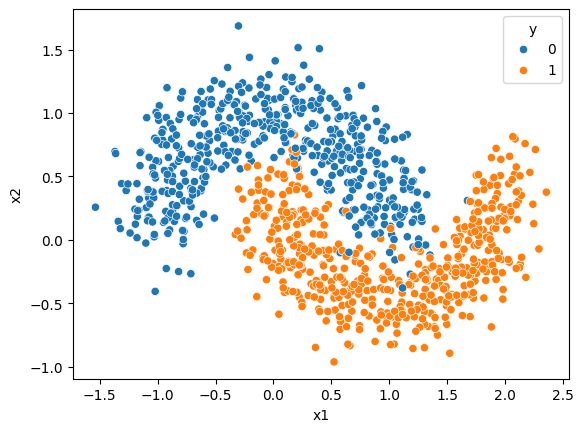

In [5]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue="y")
plt.show()

In [6]:
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]

In [7]:
from sklearn.model_selection import  train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_a,y_a, test_size=0.2,random_state=42)

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [12]:
bg = BaggingClassifier(estimator=SVC(),n_estimators=30)
bg.fit(x_train,y_train)

,estimator,SVC()
,n_estimators,30
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [14]:
bg.score(x_train,y_train)*100, bg.score(x_test,y_test)*100

(97.625, 96.0)

In [15]:
rf = RandomForestClassifier(n_estimators=30)
rf.fit(x_train,y_train)

,n_estimators,30
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
rf.score(x_train,y_train)*100, rf.score(x_test,y_test)*100

(100.0, 97.5)

# Bagging Rregression

In [17]:
import pandas as pd 

In [18]:
dataset = pd.read_csv("placed.csv")
dataset.head(3)

,cgps,score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.26,1


In [19]:
dataset.drop(columns="placed",inplace=True)

In [20]:
dataset.head(2)

,cgps,score
0,8.14,6.52
1,6.17,5.17


In [21]:
x = dataset.iloc[:,:-1]
y = dataset["score"]

In [22]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [24]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [25]:
bgr = BaggingRegressor(estimator=LinearRegression(),n_estimators=30)
bgr.fit(x_train,y_train)

,estimator,LinearRegression()
,n_estimators,30
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [26]:
bgr.score(x_train,y_train)*100, bgr.score(x_test,y_test)*100

(90.58805620749305, 90.61034974249479)

In [29]:
rdm = RandomForestRegressor(n_estimators=30)
rdm.fit(x_train,y_train)

,n_estimators,30
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
rdm.score(x_train,y_train)*100, rdm.score(x_test,y_test)*100

(97.90546933579274, 89.07160436790791)